$23 ^\circ C$

$P_0 = 105.94 kPa$

$V_0 = 20mL$

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import table
%matplotlib inline

In [2]:
#gamma of air
gamma = 1.4
Ti = 23 + 273.15
R = 8.314 * 1000 #because kPa
cv = 20.8 * 1000 #kJ/molK
k = .4 * 1000 #kW/mK
L = .001 #m thickness
D = .0205 #m diameter

In [3]:
f = []
for fil in os.listdir():
    if fil[:4] == 'lab4' and fil[-4:] == '.csv':
        f.append(fil)
sorted(f)

['lab4-adiabatic-1.csv',
 'lab4-adiabatic-2.csv',
 'lab4-adiabatic-3.csv',
 'lab4-adiabatic-4.csv',
 'lab4-adiabatic-5.csv',
 'lab4-adiabaticex-1.csv',
 'lab4-adiabaticex-2.csv',
 'lab4-adiabaticex-3.csv',
 'lab4-adiabaticex-4.csv',
 'lab4-adiabaticex-5.csv',
 'lab4-errorvisual.csv',
 'lab4-isothermal-1.csv',
 'lab4-isothermal-2.csv',
 'lab4-isothermal-3.csv',
 'lab4-isothermal-4.csv',
 'lab4-isothermal-5.csv',
 'lab4-isothermalex-1.csv',
 'lab4-isothermalex-2.csv',
 'lab4-isothermalex-3.csv',
 'lab4-isothermalex-4.csv',
 'lab4-isothermalex-5.csv',
 'lab4-values.csv']

In [4]:
adcomp1 = pd.read_csv('lab4-adiabatic-1.csv')
adcomp2 = pd.read_csv('lab4-adiabatic-2.csv')
adcomp3 = pd.read_csv('lab4-adiabatic-3.csv')
adcomp4 = pd.read_csv('lab4-adiabatic-4.csv')
adcomp5 = pd.read_csv('lab4-adiabatic-5.csv')

adex1 = pd.read_csv('lab4-adiabaticex-1.csv')
adex2 = pd.read_csv('lab4-adiabaticex-2.csv')
adex3 = pd.read_csv('lab4-adiabaticex-3.csv')
adex4 = pd.read_csv('lab4-adiabaticex-4.csv')
adex5 = pd.read_csv('lab4-adiabaticex-5.csv')

isocomp1 = pd.read_csv('lab4-isothermal-1.csv')
isocomp2 = pd.read_csv('lab4-isothermal-2.csv')
isocomp3 = pd.read_csv('lab4-isothermal-3.csv')
isocomp4 = pd.read_csv('lab4-isothermal-4.csv')
isocomp5 = pd.read_csv('lab4-isothermal-5.csv')

isoex1 = pd.read_csv('lab4-isothermalex-1.csv')
isoex2 = pd.read_csv('lab4-isothermalex-2.csv')
isoex3 = pd.read_csv('lab4-isothermalex-3.csv')
isoex4 = pd.read_csv('lab4-isothermalex-4.csv')
isoex5 = pd.read_csv('lab4-isothermalex-5.csv')

c = -2000

data = [[adcomp3[:c], adcomp4[:c], adcomp5[:c]],
        [adex1[:c], adex2[:c], adex3[:c]],
        [isocomp1[:c], isocomp3[:c], isocomp4[:c]],
        [isoex2[:c], isoex3[:c], isoex5[:c]]]

t = 'Latest: Time (s)'
P = 'Latest: Pressure (kPa)'

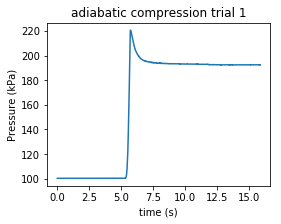

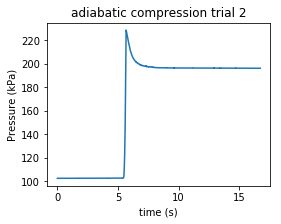

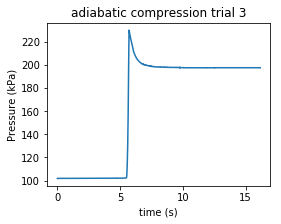

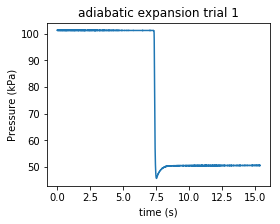

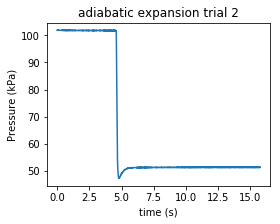

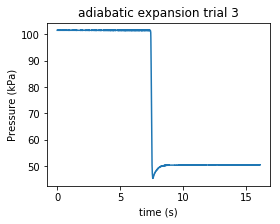

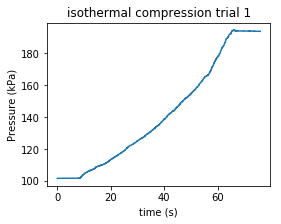

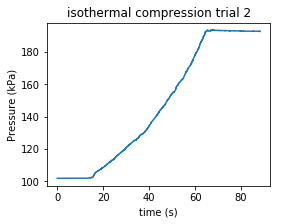

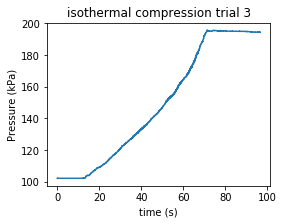

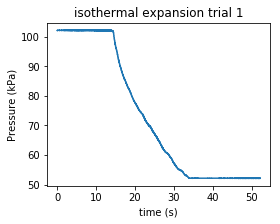

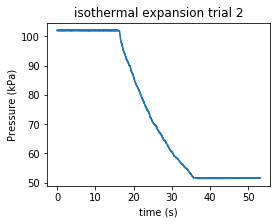

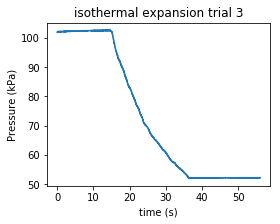

In [5]:
dataorder = ['adiabatic-compression', 'adiabatic-expansion',
             'isothermal-compression', 'isothermal-expansion']
dataordernodash = ['adiabatic compression', 'adiabatic expansion',
             'isothermal compression', 'isothermal expansion']
for i, thing in enumerate(data):
    for j, trial in enumerate(thing):
        fig = plt.figure(figsize=(4,3))
        ax = fig.add_subplot(111)
        ax.plot(trial[t], trial[P])
        ax.set_xlabel('time (s)')
        ax.set_ylabel('Pressure (kPa)')
        ax.set_title(dataordernodash[i]+' trial '+str(j+1))
        ax.figure.savefig('images/lab4-'+dataorder[i]+'-trial-'+str(j+1)+'.png')

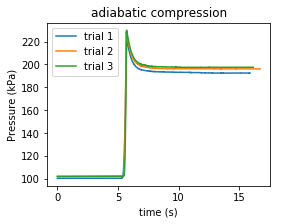

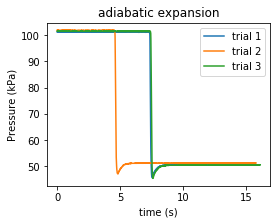

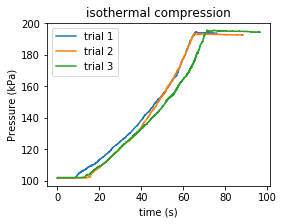

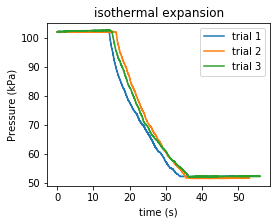

In [6]:
dataorder = ['adiabatic-compression', 'adiabatic-expansion',
             'isothermal-compression', 'isothermal-expansion']
dataordernodash = ['adiabatic compression', 'adiabatic expansion',
             'isothermal compression', 'isothermal expansion']
for i, thing in enumerate(data):
    fig = plt.figure(figsize=(4,3))
    ax = fig.add_subplot(111)
    for j, trial in enumerate(thing):
        ax.plot(trial[t], trial[P], label='trial '+str(j+1))
        ax.legend()
        ax.set_xlabel('time (s)')
        ax.set_ylabel('Pressure (kPa)')
        ax.set_title(dataordernodash[i])
        ax.figure.savefig('images/lab4-'+dataorder[i]+'.png')

In [7]:
cc2m3 = 10**(-6)
Pis = []
Pfs = []
actualPms = []
actualTms = []
theoryPms = []
theorynis = []
theoryTms = []
theorynfs = []
theorycorTms = []
dQs = []
dUs = []
Ws = []
dQdts = []
Qs = []
theoryWs = []
things = []
trials = []
varQs = []
varTs = []
for i, thing in enumerate(data):
    for j, trial in enumerate(thing):
        things.append(dataordernodash[i])
        trials.append(j+1)
        if i%2 == 0:
            Vi = 20*cc2m3
            Vm = 10*cc2m3
            Vf = 10*cc2m3

        else:
            Vi = 10*cc2m3
            Vm = 20*cc2m3
            Vf = 20*cc2m3

        if i < 2:
            Pi = np.average(trial[P][:100])
            Pf = np.average(trial[P][-100:])

            if i == 0:
                Pmact = max(trial[P])
            if i == 1:
                Pmact = min(trial[P])

            Pis.append(Pi)
            Pfs.append(Pf)
            actualPms.append(Pm)

            Pm = Pi*(Vi/Vm)**gamma
            theoryPms.append(Pm)

            ni = Pi*Vi/(R*Ti)
            theorynis.append(ni)

            Tm = Pm*Vm/(ni*R)
            theoryTms.append(Tm)

            nf = Pf*Vf/(R*Ti)
            theorynfs.append(nf)

            Tmact = Pmact*Vm/(nf*R)
            actualTms.append(Tmact)

            Tmcor = Pm*Vm/(nf*R)
            theorycorTms.append(Tmcor)

            dU = nf*cv*(Tmact-Ti)
            dUs.append(dU)

            W = 1/(gamma-1)*(Pi*Vi-Pm*Vm)
            Ws.append(W)

            theoryW = None
            theoryWs.append(theoryW)

            dQ = dU + W
            dQs.append(dQ)

            dQdt = k*4*Vm/D/L*(Ti-Tmact)
            dQdts.append(dQdt)

            for x in np.arange(list(trial[P]).index(Pmact), len(trial[P])):
                if trial[P][x+1] > trial[P][x] - .5*(max(trial[P][:100])-min((trial[P][:100]))):
                    tcool = trial[t][list(trial[P]).index(Pmact)] - trial[t][x]
                    break

            Q = k*4*Vm/D/L*(Ti-Tmact)*tcool
            Qs.append(Q)

            varQ = sum([((k*4*Vm/D/L*Ti*(1-Pmi/Pf))-(k*4*Vm/D/L*Ti*(1-Pm/Pf)))**2/(len(trial[P])-1) for Pmi in trial[P]])
            varQs.append(varQ)

        else:
            Pi = np.average(trial[P][:100])
            Pf = np.average(trial[P][-100:])

            if i == 2:
                Pmact = max(trial[P])
            if i == 3:
                Pmact = min(trial[P])

            Pis.append(Pi)
            Pfs.append(Pf)
            actualPms.append(Pm)

            Pm = Pi*(Vi/Vm)**gamma
            theoryPms.append(Pm)

            ni = Pi*Vi/(R*Ti)
            theorynis.append(ni)

            Tm = Ti
            theoryTms.append(Tm)

            nf = Pm*Vm/(R*Ti)
            theorynfs.append(nf)

            Tmact = Pmact*Vm/(nf*R)
            actualTms.append(Tmact)

            Tmcor = Ti
            theorycorTms.append(Tmcor)

            dU = None
            dUs.append(dU)

            W = nf*R*Ti*(np.log(Pi)-np.log(Pm))
            Ws.append(W)

            theoryW = ni*R*Ti*np.log(.5)
            theoryWs.append(theoryW)

            dQ = None
            dQs.append(dQ)

            dQdt = None
            dQdts.append(dQdt)

            varT = sum([((Pmi*Vm/(nf*R)) - Ti)**2/(len(trial[P])-1) for Pmi in trial[P]])

            for x in np.arange(list(trial[P]).index(Pmact), len(trial[P])):
                if trial[P][x+1] > trial[P][x] - (max(trial[P][:100])-min((trial[P][:100]))):
                    tcool = trial[t][list(trial[P]).index(Pmact)] - trial[t][x]
                    break

            Q = None
            Qs.append(Q)

NameError: name 'Pm' is not defined

In [ ]:
cols = ['inital Pressure', 'final Pressure', 'actual middle Pressure', 'theoretical middle Pressure',
        'actual middle Temp', 'theoretical middle Temp', 'corrected theoretical middle Temp', 'theoretical inital n',
        'theoretical final n', 'delta Q', 'Q', 'dQ/dt', 'delta U', 'theoretical Work', 'actual Work', 'variance in Q', 'variance in T']
vals = pd.DataFrame({'type': things, 'trial': trials, cols[0]:Pis, cols[1]:Pfs, cols[2]:actualPms, cols[4]:actualTms, cols[3]:theoryPms, cols[7]:theorynis,
              cols[5]:theoryTms, cols[8]:theorynfs, cols[6]:theorycorTms, cols[9]:dQs, cols[12]:dUs, cols[14]:Ws,
              cols[11]:dQdts, cols[10]:Qs, cols[13]:theoryWs, cols[15]:varQ, cols[16]:varT}, columns=(['type', 'trial']+cols))

In [ ]:
vals

In [ ]:
vals.to_csv('lab4-values.csv')

In [8]:
error = pd.read_csv('lab4-errorvisual.csv')

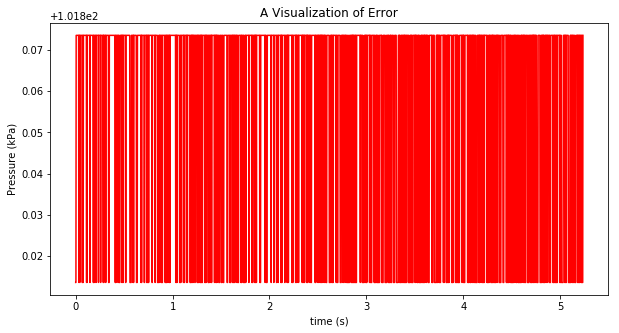

In [9]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(error[t], error[P], c=(1,0,0))
ax.set_xlabel('time (s)')
ax.set_ylabel('Pressure (kPa)')
ax.set_title('A Visualization of Error')
ax.figure.savefig('lab4-error-plot.png')